In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql



import seaborn as sns

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

import squarify # for tree maps
%matplotlib notebook

init_notebook_mode(connected=True)


# Case Study

### Universal_Bank Data
#### ID: Customer ID
#### Age: Customer's age in completed years
#### Experience:  of years of professional experience
#### Income: Annual income of the customer in thousands of Dollars
#### ZIPCode: Home Address ZIP code. Do not use ZIP code
#### Family: Family size of the customer
#### CCAvg: Avg. spending on credit cards per month in thousands of Dollars
#### Mortgage: Value of house mortgage if any. (thousands of Dollars)
#### PersonalLoan: Did this customer accept the personal loan offered in the last campaign?
#### SecuritiesAccount: Does the customer have a securities account with the bank?
#### CDAccount: Does the customer have a certificate of deposit (CD) account with the bank?
#### Online: Does the customer use internet banking facilities?
#### CreditCard: Does the customer use a credit card issued by UniversalBank?


In [2]:
BankData=pd.read_csv(r"C:\Users\Mounishwar reddy\Desktop\sc\Project Universal Bank\UniversalBank.csv", header=0)


In [3]:
BankData=BankData.replace("?",np.NaN)
BankData=BankData.replace(",",np.NaN)

In [4]:
BankData.head(5)

ID Age Experience Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1  25          1     49    91107       4    1.6          1         0   
1   2  45         19     34    90089       3    1.5          1         0   
2   3  39         15     11    94720       1    1.0          1         0   
3   4  35          9    100    94112       1    2.7          2         0   
4   5  35          8     45    91330       4    1.0          2         0   

   PersonalLoan  SecuritiesAccount  CDAccount  Online  CreditCard  
0             0                  1          0       0           0  
1             0                  1          0       0           0  
2             0                  0          0       0           0  
3             0                  0          0       0           0  
4             0                  0          0       0           1

In [5]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                4998 non-null   object 
 2   Experience         4998 non-null   object 
 3   Income             4987 non-null   object 
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 547.0+ KB


In [6]:
BankData.shape

(5000, 14)

In [7]:
BankData.dtypes

ID                     int64
Age                   object
Experience            object
Income                object
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [8]:
BankData.isnull().sum()

#There Are No Null Values so No Imputations

ID                    0
Age                   2
Experience            2
Income               13
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

In [9]:
Loan_count = BankData.PersonalLoan.value_counts()
print('Non Event Class 0(no):', Loan_count [0])
print('Event Class 1(yes):', Loan_count [1])
print("Event rate=",(Loan_count [1]/Loan_count [0])*100)

#Not an Imbalaced Data Set

Non Event Class 0(no): 4520
Event Class 1(yes): 480
Event rate= 10.619469026548673


In [10]:
BankData['PersonalLoan'].unique()

array([0, 1], dtype=int64)

In [11]:
BankData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
# Delete the variables which are not influencing the target variable and display first 5 records

del BankData['ID']
del BankData['ZIPCode']


In [13]:
BankData.head(5)

Age Experience Income  Family  CCAvg  Education  Mortgage  PersonalLoan  \
0  25          1     49       4    1.6          1         0             0   
1  45         19     34       3    1.5          1         0             0   
2  39         15     11       1    1.0          1         0             0   
3  35          9    100       1    2.7          2         0             0   
4  35          8     45       4    1.0          2         0             0   

   SecuritiesAccount  CDAccount  Online  CreditCard  
0                  1          0       0           0  
1                  1          0       0           0  
2                  0          0       0           0  
3                  0          0       0           0  
4                  0          0       0           1

In [14]:
BankData = BankData.dropna(axis=0)

In [15]:
BankData.shape

(4983, 12)

In [16]:
BankData.isnull().sum()

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [17]:
#cols_norm=['Age','Experience','Income','CCAvg','Mortgage',]
#Columns to Normalize Tree-based models therefore normalization is not required

In [18]:
Education_dict = {1:'Undergrad',
                2: 'Graduate' ,
                3: 'Advanced/Professional'
           }
PersonalLoan_dict={
    0:'No',
    1:'Yes'
}

SecuritiesAccount_dict={
    0:'No',
    1:'Yes'
}

CDAccount_dict={
    0:'No',
    1:'Yes'
}

Online_dict={
    0:'No',
    1:'Yes'
}

CreditCard_dict={
    0:'No',
    1:'Yes'
}

In [19]:
BankData = BankData.replace({"Education":Education_dict,
                "PersonalLoan":PersonalLoan_dict,
                "SecuritiesAccount":SecuritiesAccount_dict,
                "CDAccount":CDAccount_dict,
                "Online":Online_dict,
                "CreditCard":CreditCard_dict  
                })

In [20]:
BankData.dtypes

Age                   object
Experience            object
Income                object
Family                 int64
CCAvg                float64
Education             object
Mortgage               int64
PersonalLoan          object
SecuritiesAccount     object
CDAccount             object
Online                object
CreditCard            object
dtype: object

In [21]:
BankData['Age']=BankData['Age'].astype(int)

In [22]:
BankData['Experience']=BankData['Experience'].astype(int)

In [23]:
BankData['Income']=BankData['Income'].astype(int)

In [24]:
BankData.dtypes

Age                    int32
Experience             int32
Income                 int32
Family                 int64
CCAvg                float64
Education             object
Mortgage               int64
PersonalLoan          object
SecuritiesAccount     object
CDAccount             object
Online                object
CreditCard            object
dtype: object

In [25]:
cat_cols = []

for i in BankData.columns:
    if BankData[i].dtype =='object' or len(np.unique(BankData[i]))<=15 : # if the number of levels is less that 15 considering the column as categorial
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(BankData[i])),np.unique(BankData[i])))

Family : 4 : [1 2 3 4] 
Education : 3 : ['Advanced/Professional' 'Graduate' 'Undergrad'] 
PersonalLoan : 2 : ['No' 'Yes'] 
SecuritiesAccount : 2 : ['No' 'Yes'] 
CDAccount : 2 : ['No' 'Yes'] 
Online : 2 : ['No' 'Yes'] 
CreditCard : 2 : ['No' 'Yes'] 


In [26]:
num_cols = [i for i in BankData.columns if i not in cat_cols]
num_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [27]:
BankData['Income']=BankData['Income']*1000
BankData['CCAvg']=BankData['CCAvg']*1000
BankData['Mortgage']=BankData['Mortgage']*1000

# EDA
## Univariate analysis

## 1.What is the Personal Loan rate from the Bank?

In [28]:
BankData.PersonalLoan.value_counts()

No     4505
Yes     478
Name: PersonalLoan, dtype: int64

In [29]:
temp = BankData.PersonalLoan.value_counts()
temp.index

Index(['No', 'Yes'], dtype='object')

In [30]:
trace = go.Bar(x=temp.index,
               y= temp.values,
               text = temp.values,
               textposition = 'inside',
               name = 'PersonalLoan')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Personal Loan Rate"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [31]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [32]:
def plot_bar(col_name):
    # create a table with value counts
    temp = BankData[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index, # x axis values
            y=np.round(temp.values/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

In [33]:
plot_bar('PersonalLoan')

## 2. What is the Age Distribution in taking Personal Loan from Bank?

In [34]:
plot_bar('Age')

## 3. What is the  educational background of the Customers In Bank (EducationField)?

In [35]:
plot_bar('Education')

## 4. What is the income of the customers in the bank?

In [36]:
plot_bar('Income')

## 5.Does the customer have a certificate of deposit (CD) account with the bank?

In [37]:
plot_bar('CDAccount')

## 6.Does the customers have Credit card?

In [38]:
plot_bar('CreditCard')

## 7.Does the customers taken  securities account?

In [39]:
plot_bar('SecuritiesAccount')

## 8.Does Customers using Online Banking Service?

In [40]:
plot_bar('Online')

## 9.How much professional experienced people are in Bank?(EXPERIENCE)

In [41]:
plot_bar('Experience')

## 10.Family size of Customers  in Bank?

In [42]:
plot_bar('Family')

## 11.CCAvg of Customers in the Bank?

In [43]:
plot_bar('CCAvg')

## Histogram For Numericals

## 1.What is the Age Distribution in  Bank?

In [44]:
data = [go.Histogram(x=BankData.Age,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Age")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

## 2.What is Mortage Status of Customers In our Bank?

In [45]:


data = [go.Histogram(x=BankData.Mortgage,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Mortagage")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

## 3.How much professional experienced people are in Bank?(EXPERIENCE)

In [46]:
data = [go.Histogram(x=BankData.Experience,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Experience")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

## 4. What is the income of the customers in the bank?

In [47]:
data = [go.Histogram(x=BankData.Income,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Income")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

## 5.CCAvg of Customers in the Bank?

In [48]:
data = [go.Histogram(x=BankData.CCAvg,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of CCAvg")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

## Bivariate analysis

## 1.Is there any Relation B/w Personal Loan and Education?

In [49]:

Edu_Loan = BankData.groupby(['Education','PersonalLoan']).size().reset_index()
Edu_Loan.columns = ['Education','PersonalLoan','Count']
Edu_Loan

Education PersonalLoan  Count
0  Advanced/Professional           No   1292
1  Advanced/Professional          Yes    204
2               Graduate           No   1217
3               Graduate          Yes    181
4              Undergrad           No   1996
5              Undergrad          Yes     93

In [50]:
trace1 = go.Bar(x = Edu_Loan.Education[Edu_Loan.PersonalLoan=='Yes'],
               y = Edu_Loan.Count[Edu_Loan.PersonalLoan=='Yes'],
                text = Edu_Loan.Count[Edu_Loan.PersonalLoan=='Yes'],
                textposition = 'auto',
               name = 'Loan Yes')

trace2 = go.Bar(x = Edu_Loan.Education[Edu_Loan.PersonalLoan=='No'],
               y = Edu_Loan.Count[Edu_Loan.PersonalLoan=='No'],
                 text = Edu_Loan.Count[Edu_Loan.PersonalLoan=='No'],
                textposition = 'auto',
               name = 'Loan No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Education vs PersonalLoan')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 2. Is there any relation B/w CreditCard and PersonalLoan?

In [51]:

Cred_Loan = BankData.groupby(['CreditCard','PersonalLoan']).size().reset_index()
Cred_Loan.columns = ['CreditCard','PersonalLoan','Count']
Cred_Loan

CreditCard PersonalLoan  Count
0         No           No   3180
1         No          Yes    335
2        Yes           No   1325
3        Yes          Yes    143

In [52]:
trace1 = go.Bar(x = Cred_Loan.CreditCard[Cred_Loan.PersonalLoan=='Yes'],
               y = Cred_Loan.Count[Cred_Loan.PersonalLoan=='Yes'],
                text = Cred_Loan.Count[Cred_Loan.PersonalLoan=='Yes'],
                textposition = 'auto',
               name = 'Loan Yes')

trace2 = go.Bar(x = Cred_Loan.CreditCard[Cred_Loan.PersonalLoan=='No'],
               y = Cred_Loan.Count[Cred_Loan.PersonalLoan=='No'],
                 text = Cred_Loan.Count[Cred_Loan.PersonalLoan=='No'],
                textposition = 'auto',
               name = 'Loan No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'CreditCard vs PersonalLoan')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 3. Is there any relation B/w Family and PersonalLoan?

In [53]:

Fa_Loan = BankData.groupby(['Family','PersonalLoan']).size().reset_index()
Fa_Loan.columns = ['Family','PersonalLoan','Count']
Fa_Loan

Family PersonalLoan  Count
0       1           No   1358
1       1          Yes    106
2       2           No   1188
3       2          Yes    106
4       3           No    873
5       3          Yes    133
6       4           No   1086
7       4          Yes    133

In [54]:
trace1 = go.Bar(x = Fa_Loan.Family[Fa_Loan.PersonalLoan=='Yes'],
               y = Fa_Loan.Count[Fa_Loan.PersonalLoan=='Yes'],
                text = Fa_Loan.Count[Fa_Loan.PersonalLoan=='Yes'],
                textposition = 'auto',
               name = 'Loan Yes')

trace2 = go.Bar(x = Fa_Loan.Family[Fa_Loan.PersonalLoan=='No'],
               y = Fa_Loan.Count[Fa_Loan.PersonalLoan=='No'],
                 text = Fa_Loan.Count[Fa_Loan.PersonalLoan=='No'],
                textposition = 'auto',
               name = 'Loan No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Family vs PersonalLoan')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 4.Is there any relation b/w age and personal loan?

In [55]:
trace1 = go.Box(y = BankData.Age[BankData.PersonalLoan=='Yes'],name = 'Loan Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Age[BankData.PersonalLoan=='No'],name= 'Loan No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Age  and PersonalLoan')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 5.Is there any relation b/w Income and PersonalLoan

In [56]:
trace1 = go.Box(y = BankData.Income[BankData.PersonalLoan=='Yes'],name = 'Loan Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Income[BankData.PersonalLoan=='No'],name= 'Loan No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Income  and PersonalLoan')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 6. Is there any relation b/w Mortgage and PersonalLoan?

In [57]:
trace1 = go.Box(y = BankData.Mortgage[BankData.PersonalLoan=='Yes'],name = 'Loan Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Mortgage[BankData.PersonalLoan=='No'],name= 'Loan No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Mortgage  and PersonalLoan')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 7. Is there any relation b/w CCAvg and PersonalLoan?

In [58]:
trace1 = go.Box(y = BankData.CCAvg[BankData.PersonalLoan=='Yes'],name = 'Loan Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.CCAvg[BankData.PersonalLoan=='No'],name= 'Loan No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'CCAvg  and PersonalLoan')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 8. B/w Experience vs PersonalLoan

In [59]:
trace1 = go.Box(y = BankData.Experience[BankData.PersonalLoan=='Yes'],name = 'Loan Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Experience[BankData.PersonalLoan=='No'],name= 'Loan No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Experience  and PersonalLoan')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 9.B/w Family vs SecuritiesAccount

In [60]:

Fa_Se = BankData.groupby(['Family','SecuritiesAccount']).size().reset_index()
Fa_Se.columns = ['Family','SecuritiesAccount','Count']
Fa_Se

Family SecuritiesAccount  Count
0       1                No   1323
1       1               Yes    141
2       2                No   1160
3       2               Yes    134
4       3                No    900
5       3               Yes    106
6       4                No   1081
7       4               Yes    138

In [61]:
trace1 = go.Bar(x = Fa_Se.Family[Fa_Se.SecuritiesAccount=='Yes'],
               y = Fa_Se.Count[Fa_Se.SecuritiesAccount=='Yes'],
                text = Fa_Se.Count[Fa_Se.SecuritiesAccount=='Yes'],
                textposition = 'auto',
               name = 'SecuritiesAccount Yes')

trace2 = go.Bar(x = Fa_Se.Family[Fa_Se.SecuritiesAccount=='No'],
               y = Fa_Se.Count[Fa_Se.SecuritiesAccount=='No'],
                 text = Fa_Se.Count[Fa_Se.SecuritiesAccount=='No'],
                textposition = 'auto',
               name = 'SecuritiesAccount No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Family vs SecuritiesAccount')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 10.Education and Online

In [62]:
Ed_o = BankData.groupby(['Education','Online']).size().reset_index()
Ed_o.columns = ['Education','Online','Count']
Ed_o

Education Online  Count
0  Advanced/Professional     No    631
1  Advanced/Professional    Yes    865
2               Graduate     No    541
3               Graduate    Yes    857
4              Undergrad     No    837
5              Undergrad    Yes   1252

In [63]:
trace1 = go.Bar(x = Ed_o.Education[Ed_o.Online=='Yes'],
               y = Ed_o.Count[Ed_o.Online=='Yes'],
                text = Ed_o.Count[Ed_o.Online=='Yes'],
                textposition = 'auto',
               name = 'Online Yes')

trace2 = go.Bar(x = Ed_o.Education[Ed_o.Online=='No'],
               y = Ed_o.Count[Ed_o.Online=='No'],
                 text = Ed_o.Count[Ed_o.Online=='No'],
                textposition = 'auto',
               name = 'Online No')


data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'Education vs Online')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 11. Age and CDAccount

In [64]:
trace1 = go.Box(y = BankData.Age[BankData.CDAccount=='Yes'],name = 'CDAccount Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Age[BankData.CDAccount=='No'],name= 'CDAccount No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Age  and CDAccount')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 12.Income vs CreditCard

In [65]:
trace1 = go.Box(y = BankData.Income[BankData.CreditCard=='Yes'],name = 'CreditCard Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Income[BankData.CreditCard=='No'],name= 'CreditCard No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Income  and CreditCard')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 13.Experience and SecuritiesAccount

In [66]:
trace1 = go.Box(y = BankData.Experience[BankData.SecuritiesAccount=='Yes'],name = 'SecuritiesAccount Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Experience[BankData.SecuritiesAccount=='No'],name= 'SecuritiesAccount No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Experience  and SecuritiesAccount')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## 15.Education and Mortgage

In [67]:
trace1 = go.Box(y = BankData.Mortgage[BankData.Education=='Undergrad'],name = ' Undergrad',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = BankData.Mortgage[BankData.Education=='Graduate'],name= 'Graduate',
#                boxpoints = 'all',jitter = 1
               )
trace3 = go.Box(y = BankData.Mortgage[BankData.Education=='Advanced/Professional'],name= ' Advanced/Professional',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2,trace3]
layout = go.Layout(width = 800,
                   height = 500,title = 'Education and Mortgage')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

## Multivariate Analysis

## 1.Education ,Income and PersonalLoan

In [68]:
data = []
for i in BankData.Education.unique():
        data.append(go.Box(y = BankData.Income[BankData.Education==i][BankData.PersonalLoan=='Yes'],
                           marker = dict(
        color = '#588061',
    ),
                           name = "{}- Yes".format(str(i))))
        data.append(go.Box(y = BankData.Income[BankData.Education==i][BankData.PersonalLoan=='No'],
                           marker = dict(
        color = '#CC0E1D',
    ),
                           name = "{}- No".format(str(i))))

layout = go.Layout(
autosize=False, # auto size the graph? use False if you are specifying the height and width
width=1000, # height of the figure in pixels
height=600, # height of the figure in pixels
title = "Boxplot of {} column based on {} ".format('Income','Education'), # title of the figure
# more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
    ),
    # granular control on the axes objects 
    xaxis=dict( 
        title='Education and PersonalLoan',
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=7, # size of ticks displayed on the x axis
        color='black'  # color of the font
    )
),
yaxis=dict(
#         range=[0,100],
    title='Income',
    titlefont=dict(
        size=14,
        color='black'
    ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig) 

## 2. Family,Age and PersonalLoan

In [69]:
data = []
for i in np.sort(BankData.Family.unique()):
        data.append(go.Box(y = BankData.Age[BankData.Family==i][BankData.PersonalLoan=='Yes'],
                           marker = dict(
        color = '#588061',
    ),
                           name = "{}- Yes".format(str(i))))
        data.append(go.Box(y = BankData.Age[BankData.Family==i][BankData.PersonalLoan=='No'],
                           marker = dict(
        color = '#CC0E1D',
    ),
                           name = "{}- No".format(str(i))))

layout = go.Layout(
autosize=False, # auto size the graph? use False if you are specifying the height and width
width=1000, # height of the figure in pixels
height=600, # height of the figure in pixels
title = "Boxplot of {} column based on {} ".format('Age','Family'), # title of the figure
# more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
    ),
    # granular control on the axes objects 
    xaxis=dict( 
        title='Family and PersonalLoan',
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the x axis
        color='black'  # color of the font
    )
),
yaxis=dict(
#         range=[0,100],
    title='Age',
    titlefont=dict(
        size=14,
        color='black'
    ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig) 

## 3.CCAvg,CreditCard,PersonalLoan

In [70]:
data = []
for i in (['Yes','No']):
        data.append(go.Box(y = BankData.CCAvg[BankData.CreditCard==i][BankData.PersonalLoan=='Yes'],
                           marker = dict(
        color = '#588061',
    ),
                           name = "{}- Loan Yes".format(str(i))))
        data.append(go.Box(y = BankData.CCAvg[BankData.CreditCard==i][BankData.PersonalLoan=='No'],
                           marker = dict(
        color = '#CC0E1D',
    ),
                           name = "{}- Loan No".format(str(i))))

layout = go.Layout(
autosize=False, # auto size the graph? use False if you are specifying the height and width
width=1000, # height of the figure in pixels
height=600, # height of the figure in pixels
title = "Boxplot of {} column based on {} ".format('CCAvg','CreditCard'), # title of the figure
# more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=14, # size of the font
        color='black' # color of the font
    ),
    # granular control on the axes objects 
    xaxis=dict( 
        title='CreditCard and PersonalLoan',
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the x axis
        color='black'  # color of the font
    )
),
yaxis=dict(
#         range=[0,100],
    title='CCAvg',
    titlefont=dict(
        size=14,
        color='black'
    ),
    tickfont=dict(
        family='Courier New, monospace', # font family
        size=14, # size of ticks displayed on the y axis
        color='black' # color of the font
    )
),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig) 

In [71]:
corrmat = BankData.corr()

corrmat

Age  Experience    Income    Family     CCAvg  Mortgage
Age         1.000000    0.994218 -0.055379 -0.045318 -0.051235 -0.011962
Experience  0.994218    1.000000 -0.046590 -0.051519 -0.049293 -0.009868
Income     -0.055379   -0.046590  1.000000 -0.156124  0.645942  0.207029
Family     -0.045318   -0.051519 -0.156124  1.000000 -0.107707 -0.022171
CCAvg      -0.051235   -0.049293  0.645942 -0.107707  1.000000  0.110983
Mortgage   -0.011962   -0.009868  0.207029 -0.022171  0.110983  1.000000

<IPython.core.display.Javascript object>


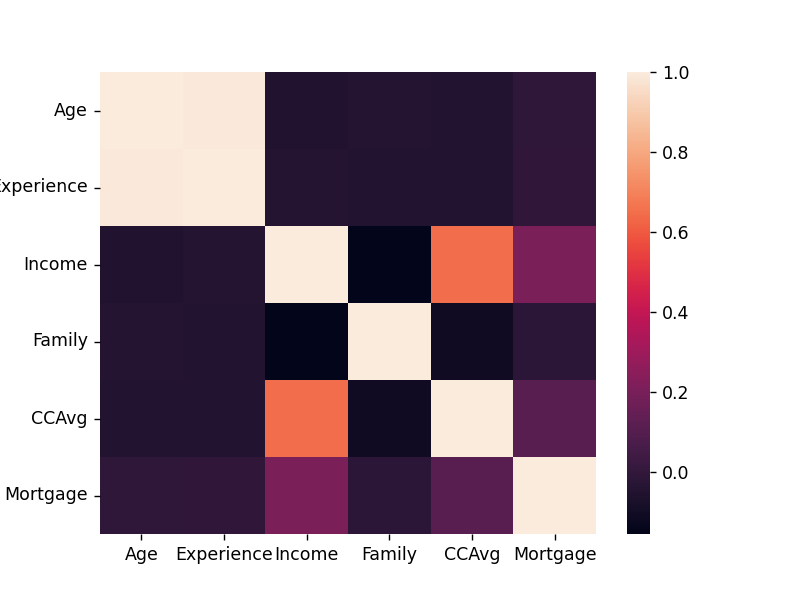

<AxesSubplot:>

In [72]:
sns.heatmap(corrmat)

<IPython.core.display.Javascript object>


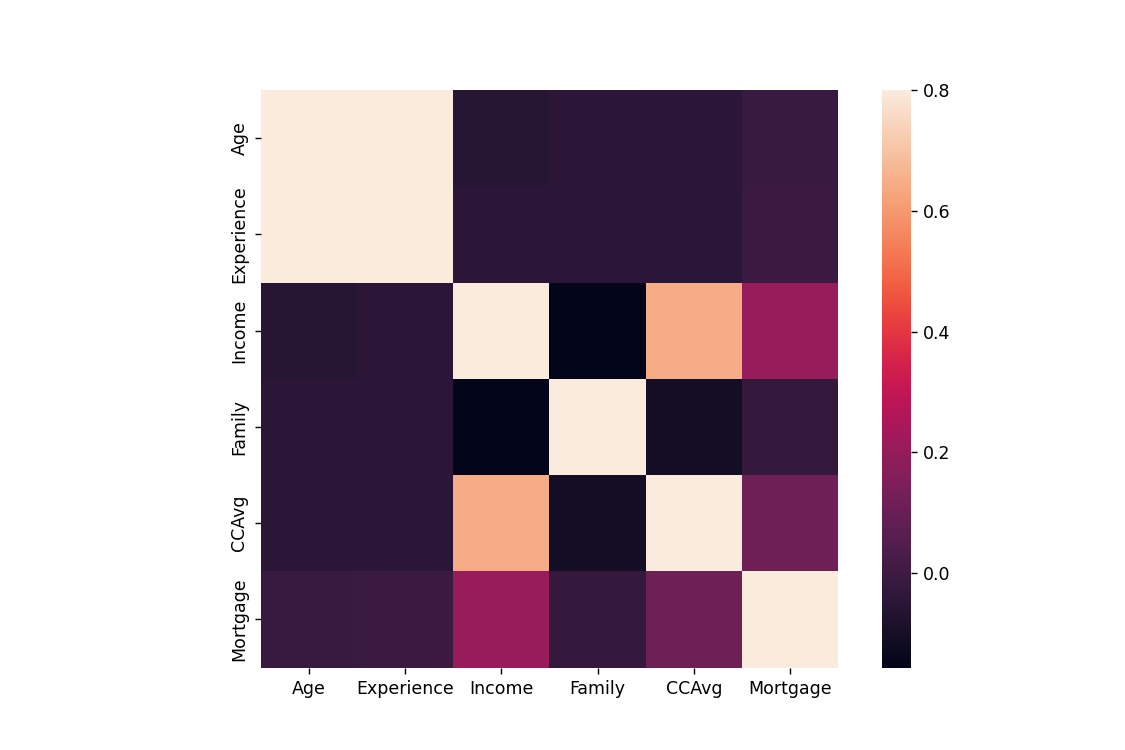

<AxesSubplot:>

In [73]:
corrmat = BankData.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

<IPython.core.display.Javascript object>


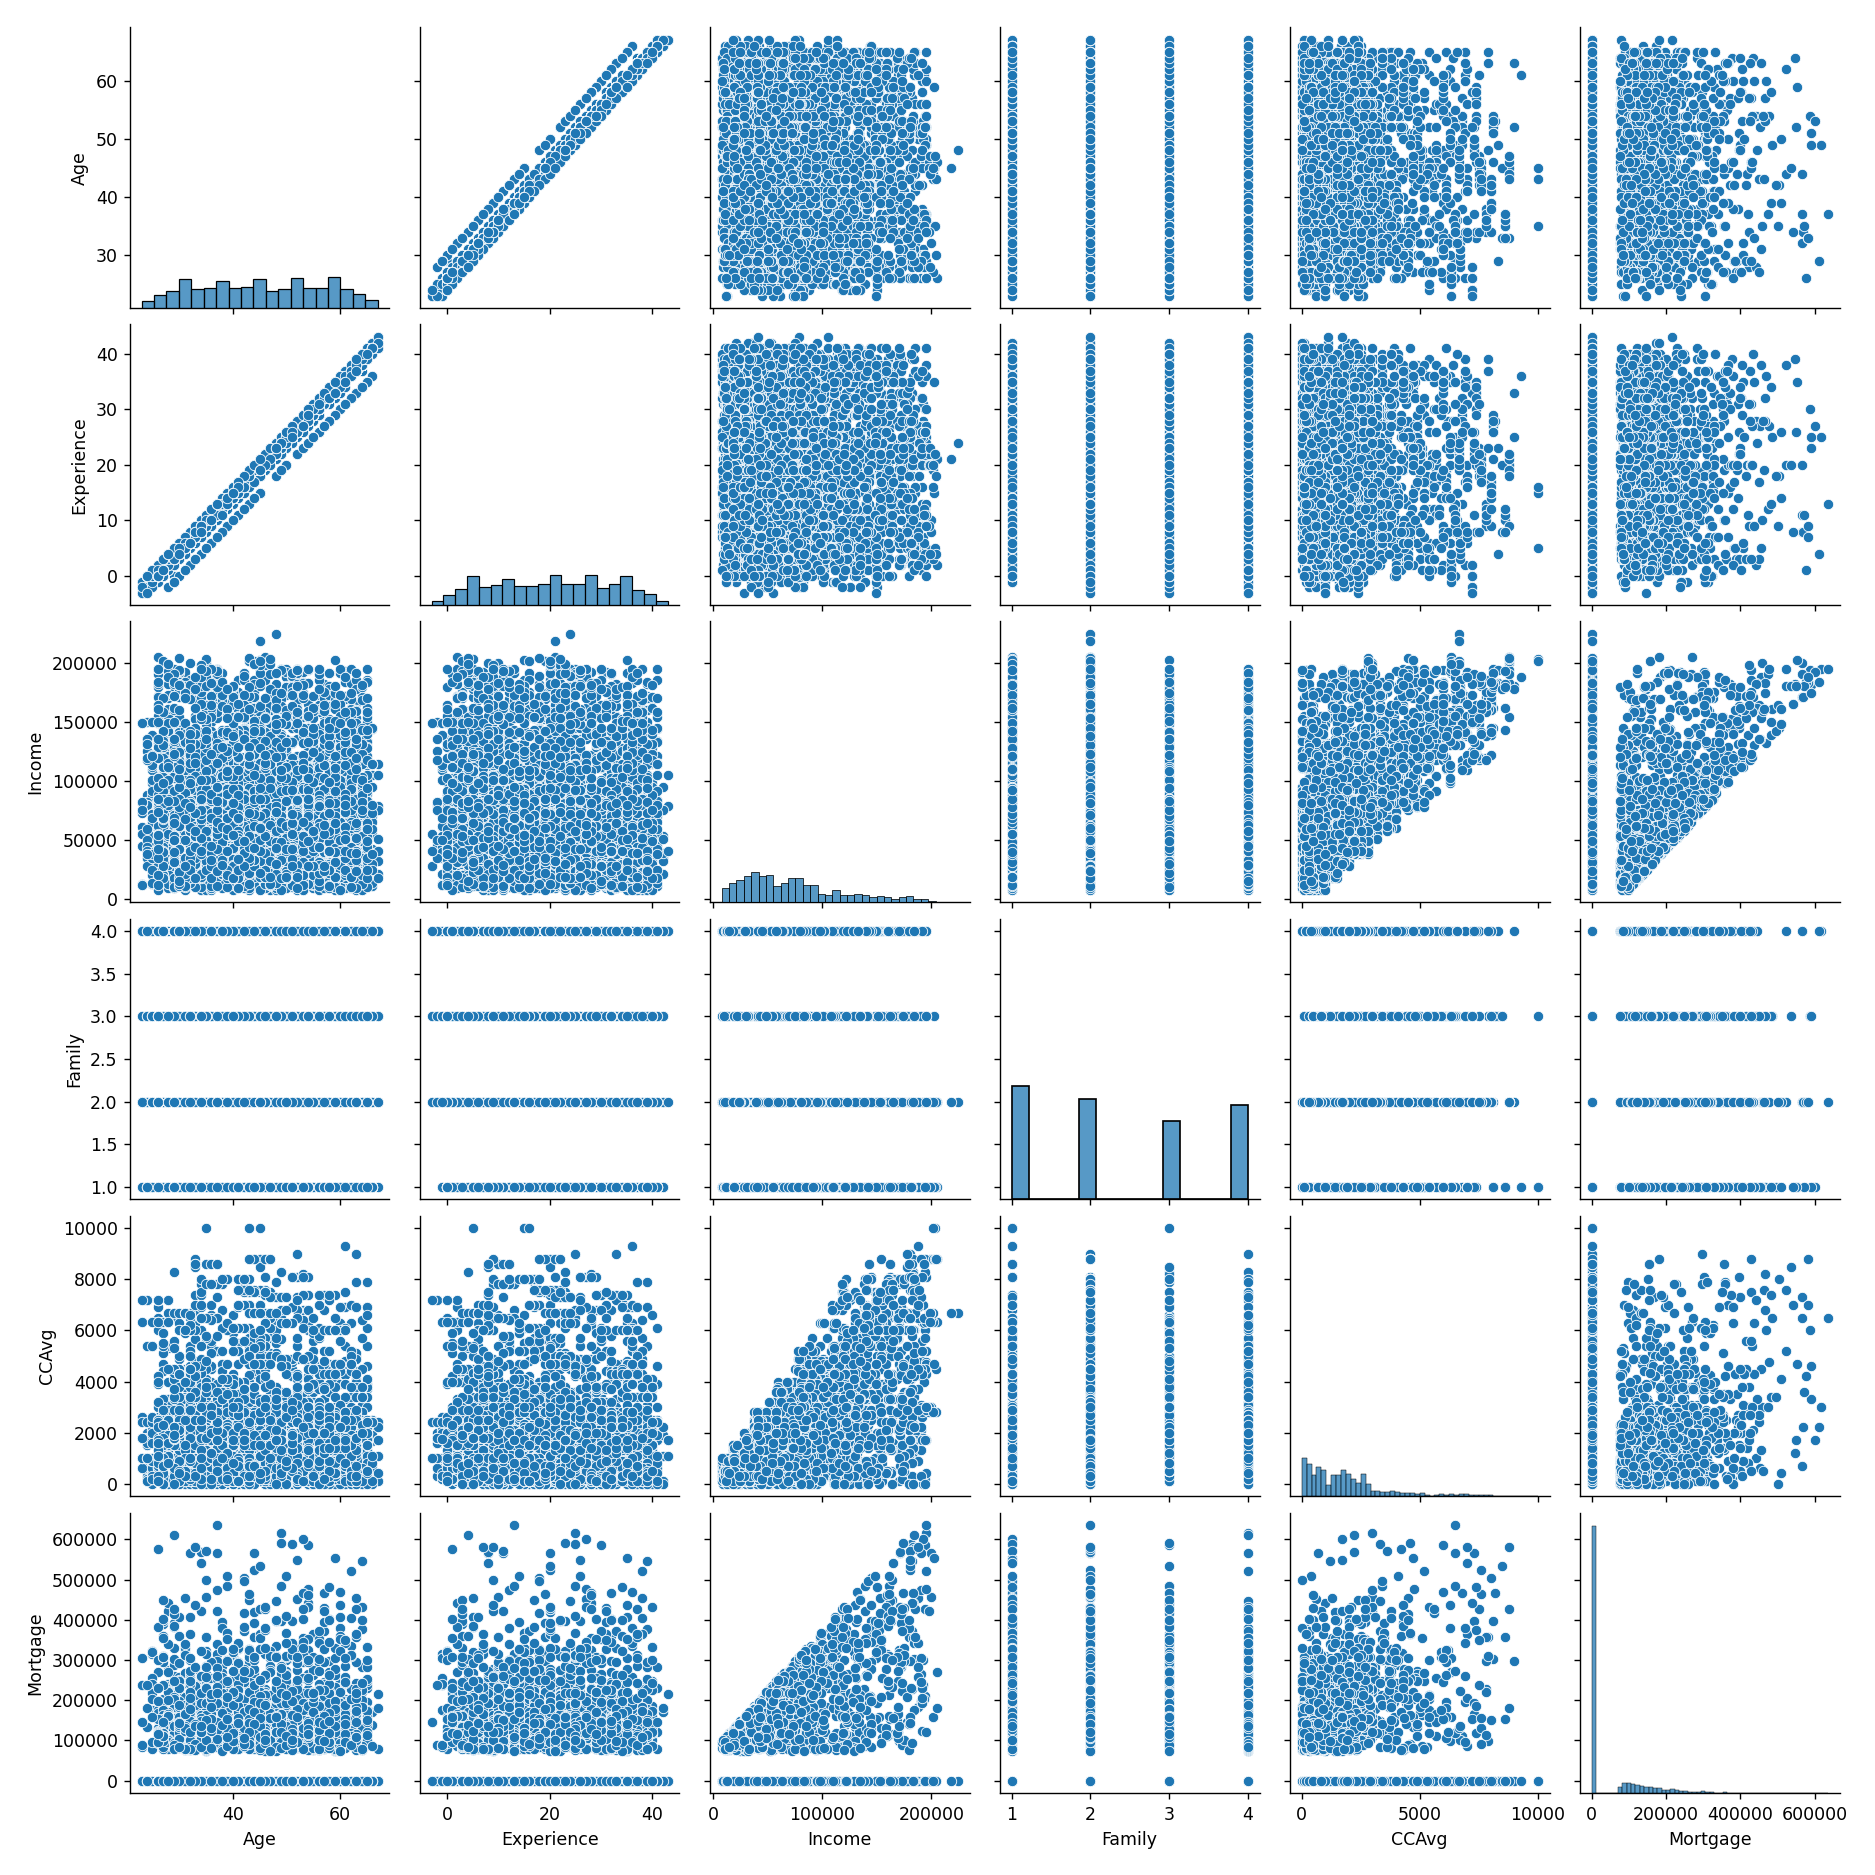

In [74]:
sns.pairplot(BankData)